# Las células HCT116 fueron transfectadas con siRNA específico para KIF26B para reducir su expresión.
# También utilizaron un siRNA de control para comparar.

In [ ]:
if (!require("BiocManager", quietly = TRUE))
  install.packages("BiocManager")
BiocManager::install

In [24]:
library(BiocManager)
BiocManager::install('heatmaps')

Bioconductor version '3.14' is out-of-date; the current release version '3.19'
  is available with R version '4.4'; see https://bioconductor.org/install

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.14 (BiocManager 1.30.23), R 4.1.3 (2022-03-10)

Installing package(s) 'heatmaps'

also installing the dependencies 'abind', 'tiff', 'jpeg', 'fftwtools', 'plotrix', 'EBImage'





  There are binary versions available but the source versions are later:
        binary source needs_compilation
tiff    0.1-11 0.1-12              TRUE
plotrix  3.8-2  3.8-4             FALSE

  Binaries will be installed
package 'abind' successfully unpacked and MD5 sums checked
package 'tiff' successfully unpacked and MD5 sums checked
package 'jpeg' successfully unpacked and MD5 sums checked
package 'fftwtools' successfully unpacked and MD5 sums checked
package 'EBImage' successfully unpacked and MD5 sums checked
package 'heatmaps' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\3060\AppData\Local\Temp\RtmpOa6ywk\downloaded_packages


installing the source package 'plotrix'


Old packages: 'boot', 'broom', 'bslib', 'callr', 'codetools', 'crul', 'curl',
  'data.table', 'DBI', 'dbplyr', 'evaluate', 'fontawesome', 'future',
  'future.apply', 'gargle', 'ggplot2', 'glmnet', 'globals', 'googledrive',
  'googlesheets4', 'gtable', 'hardhat', 'highr', 'htmlwidgets', 'httr',
  'knitr', 'labeling', 'lava', 'lifecycle', 'listenv', 'locfit', 'matrixStats',
  'munsell', 'openssl', 'prettyunits', 'progress', 'progressr', 'quantmod',
  'RcppArmadillo', 'RCurl', 'recipes', 'rematch', 'repr', 'reprex',
  'rmarkdown', 'RSQLite', 'rstudioapi', 'rvest', 'scales', 'shape', 'shiny',
  'stringr', 'tidyselect', 'tidyverse', 'tiff', 'timeDate', 'tinytex',
  'viridisLite', 'withr', 'XML', 'xml2'



In [2]:
# load libraries
library(DESeq2)
library(tidyverse)
library(airway)
library(ggplot2)
library(pheatmap)


In [3]:
# load counts table from GEO

urld <- "https://www.ncbi.nlm.nih.gov/geo/download/?format=file&type=rnaseq_counts"
path <- paste(urld, "acc=GSE150309", "file=GSE150309_raw_counts_GRCh38.p13_NCBI.tsv.gz", sep="&");
tbl <- as.matrix(data.table::fread(path, header=T, colClasses="integer"), rownames=1)

# pre-filter low count genes
# keep genes with at least 2 counts > 10
keep <- rowSums( tbl >= 10 ) >= 2
tbl <- tbl[keep, ]

In [4]:
colnames(tbl)
tbl

[1] "GSM4546541" "GSM4546542" "GSM4546543" "GSM4546544"

,GSM4546541,GSM4546542,GSM4546543,GSM4546544
653635,1235,1656,967,1371
102466751,113,132,62,87
100996442,121,119,112,152
729737,1395,1800,1275,1402
102723897,1222,1632,961,1288
102465909,39,43,23,44
112268260,20,17,17,19
100132287,548,692,474,529
113219467,341,581,231,279
81399,7,15,16,7


In [5]:
# Crear un vector con los nuevos nombres de columna
new_colnames <- c("HCT116 cells transfected with siRNA control for 48 h",
                  "HCT116 cells transfected with siRNA control for 48 h", 
                  "HCT116 cells transfected with siRNA targeting KIF26B for 48 h",
                  "HCT116 cells transfected with siRNA targeting KIF26B for 48 h")

# Cambiar los nombres de columna de la tabla
colnames(tbl) <- new_colnames
tbl
# Guardar la tabla modificada en un archivo CSV
write.csv(tbl, file = "counts_data.csv", row.names = TRUE)

,HCT116 cells transfected with siRNA control for 48 h,HCT116 cells transfected with siRNA control for 48 h,HCT116 cells transfected with siRNA targeting KIF26B for 48 h,HCT116 cells transfected with siRNA targeting KIF26B for 48 h
653635,1235,1656,967,1371
102466751,113,132,62,87
100996442,121,119,112,152
729737,1395,1800,1275,1402
102723897,1222,1632,961,1288
102465909,39,43,23,44
112268260,20,17,17,19
100132287,548,692,474,529
113219467,341,581,231,279
81399,7,15,16,7


In [6]:
# Step 1: preparing count data ----------------

# read in counts data
#counts_data <- read.csv('counts_data.csv')
counts_data <- tbl
head(counts_data)


# read in sample info
# Cargar el archivo "sample_info.csv"
colData <- read.csv("sample_info.csv")
colData

,HCT116 cells transfected with siRNA control for 48 h,HCT116 cells transfected with siRNA control for 48 h,HCT116 cells transfected with siRNA targeting KIF26B for 48 h,HCT116 cells transfected with siRNA targeting KIF26B for 48 h
653635,1235,1656,967,1371
102466751,113,132,62,87
100996442,121,119,112,152
729737,1395,1800,1275,1402
102723897,1222,1632,961,1288
102465909,39,43,23,44


sample,condition
<chr>,<chr>
HCT116 cells transfected with siRNA control for 48 h,control
HCT116 cells transfected with siRNA control for 48 h,control
HCT116 cells transfected with siRNA targeting KIF26B for 48 h,treatment
HCT116 cells transfected with siRNA targeting KIF26B for 48 h,treatment


In [7]:
# Step 2: construct a DESeqDataSet object ----------

dds <- DESeqDataSetFromMatrix(countData = counts_data,
                       colData = colData,
                       design = ~ condition)

dds

Warning message in DESeqDataSet(se, design = design, ignoreRank):
"some variables in design formula are characters, converting to factors"


class: DESeqDataSet 
dim: 18856 4 
metadata(1): version
assays(1): counts
rownames(18856): 653635 102466751 ... 4576 4571
rowData names(0):
colnames(4): HCT116 cells transfected with siRNA control for 48 h
  HCT116 cells transfected with siRNA control for 48 h HCT116 cells
  transfected with siRNA targeting KIF26B for 48 h HCT116 cells
  transfected with siRNA targeting KIF26B for 48 h
colData names(2): sample condition

In [8]:
# pre-filtering: removing rows with low gene counts
# keeping rows that have at least 10 reads total
keep <- rowSums(counts(dds)) >= 10
dds <- dds[keep,]

dds

class: DESeqDataSet 
dim: 18856 4 
metadata(1): version
assays(1): counts
rownames(18856): 653635 102466751 ... 4576 4571
rowData names(0):
colnames(4): HCT116 cells transfected with siRNA control for 48 h
  HCT116 cells transfected with siRNA control for 48 h HCT116 cells
  transfected with siRNA targeting KIF26B for 48 h HCT116 cells
  transfected with siRNA targeting KIF26B for 48 h
colData names(2): sample condition

In [9]:
# set the factor level
dds$condition <- relevel(dds$condition, ref = "control")
dds$condition

[1] control   control   treatment treatment
Levels: control treatment

In [10]:
# NOTE: collapse technical replicates

# Step 3: Run DESeq ----------------------
dds <- DESeq(dds)
res <- results(dds)

res

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



log2 fold change (MLE): condition treatment vs control 
Wald test p-value: condition treatment vs control 
DataFrame with 18856 rows and 6 columns
           baseMean log2FoldChange     lfcSE       stat     pvalue      padj
          <numeric>      <numeric> <numeric>  <numeric>  <numeric> <numeric>
653635    1298.1020     -0.0454944  0.285880 -0.1591379   0.873560  0.967839
102466751   97.0281     -0.4724150  0.411529 -1.1479507   0.250989  0.653521
100996442  127.7742      0.3692602  0.388017  0.9516595   0.341270  0.729841
729737    1454.2313     -0.0123462  0.234481 -0.0526535   0.958008  0.988743
102723897 1264.1198     -0.0864978  0.274515 -0.3150929   0.752691  0.933408
...             ...            ...       ...        ...        ...       ...
4541      43028.959       0.300734  0.238516   1.260859 0.20735980 0.6031965
4556       2706.437       0.346402  0.261126   1.326568 0.18465156 0.5787149
4519      77629.874       0.137561  0.303461   0.453305 0.65032888 0.8983126
4576  

In [11]:
# Explore Results ----------------

summary(res)


out of 18856 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 448, 2.4%
LFC < 0 (down)     : 414, 2.2%
outliers [1]       : 0, 0%
low counts [2]     : 4022, 21%
(mean count < 42)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [12]:
#export normalized read counts
normCounts <- counts(dds, normalized = T)
write.csv(normCounts, "normal_Fusobacterium_Nucleatum.csv")


In [13]:
res <- results(dds, alpha = 0.05)
summary(res)


out of 18856 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)       : 275, 1.5%
LFC < 0 (down)     : 276, 1.5%
outliers [1]       : 0, 0%
low counts [2]     : 3291, 17%
(mean count < 30)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [14]:
# contrasts
resultsNames(dds)


[1] "Intercept"                      "condition_treatment_vs_control"

In [31]:
#output DESeq results
resOrdered <- res[order(res$padj),]
write.csv(resOrdered, "deseq_Fusobacterium_Nucleatum.csv")

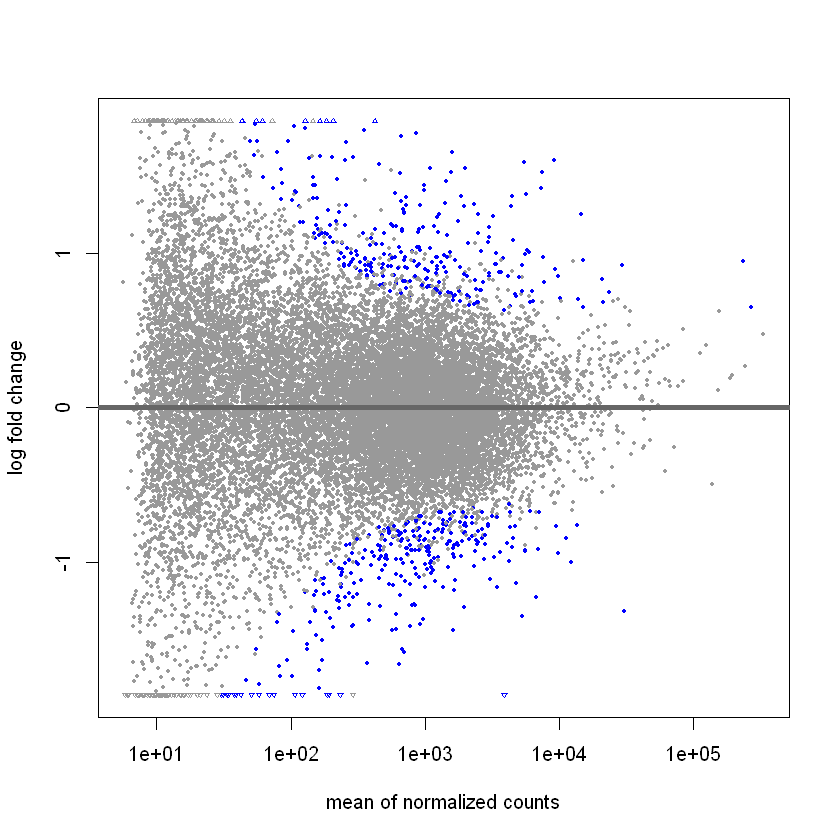

In [32]:
# MA plot
plotMA(res)

In [15]:
normCount <- read.csv("normal_Fusobacterium_Nucleatum.csv", row.names = 1)
deSeqRes <- read.csv("deseq_Fusobacterium_Nucleatum.csv", row.names = 1)
deSeqRes$sig <- ifelse(deSeqRes$padj <= 0.05, "yes", "no")
deSeqRes <- na.omit(deSeqRes)
deSeqRes

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,sig
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
3398,3889.2034,-1.948755,0.2692731,-7.237095,4.583972e-13,2.378317e-09,yes
1490,192.0596,-2.274382,0.3142293,-7.237970,4.554507e-13,2.378317e-09,yes
23193,9258.2358,1.596426,0.2194676,7.274085,3.487766e-13,2.378317e-09,yes
140766,2001.4497,1.548630,0.2173873,7.123829,1.049692e-12,4.084614e-09,yes
4092,233.5218,-2.336285,0.3331416,-7.012890,2.334451e-12,7.267147e-09,yes
5099,1098.8481,1.547391,0.2235653,6.921426,4.471186e-12,9.942001e-09,yes
7057,644.3141,-1.658349,0.2393207,-6.929400,4.226290e-12,9.942001e-09,yes
84836,1450.9825,1.462793,0.2190736,6.677178,2.435869e-11,4.739287e-08,yes
389136,107.1994,-2.693762,0.4111410,-6.551916,5.680336e-11,9.823825e-08,yes


Gráfico de dispersión de log2FoldChange vs. log1O(baseMean):

Este gráfico te permite visualizar la relación entre la expresión media de los genes (log1O(baseMean)) y la diferencia de expresión entre condiciones (log2FoldChange). Los genes con una mayor diferencia de expresión y una mayor expresión media son más probables de ser importantes.

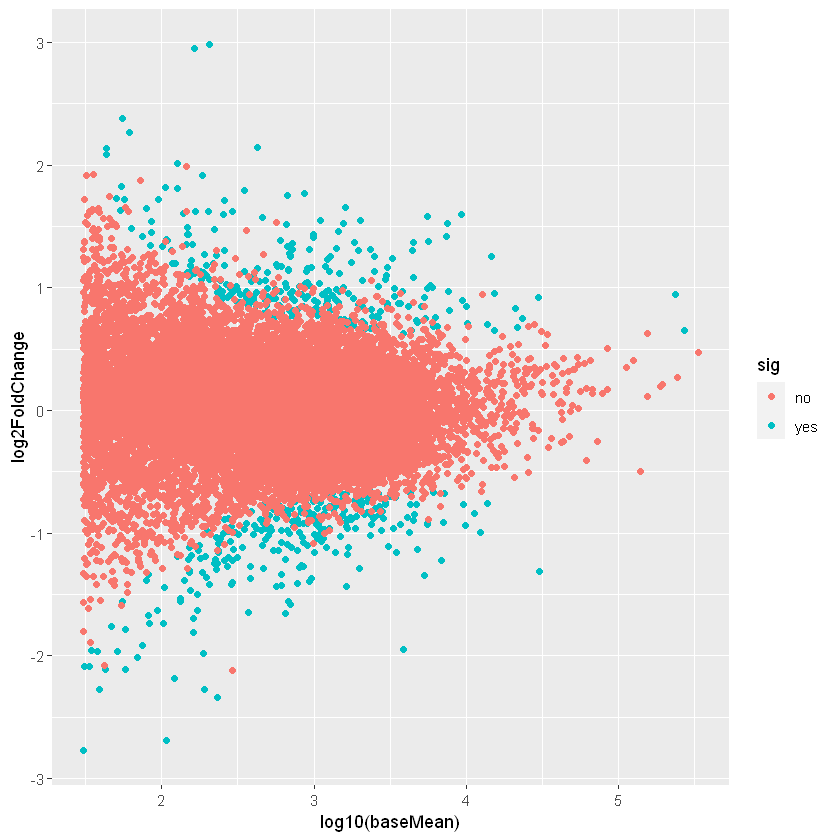

In [16]:
#Gráfico PlotMa
ggplot(deSeqRes, aes(x = log10(baseMean), y = log2FoldChange, color = sig)) + geom_point()

Gráfico de dispersión de log2FoldChange vs. p-value:

Este gráfico permite visualizar la relación entre la diferencia de expresión y el nivel de significación (p-value). Los genes con una mayor diferencia de expresión y un p-value más bajo son más probables de ser importantes.

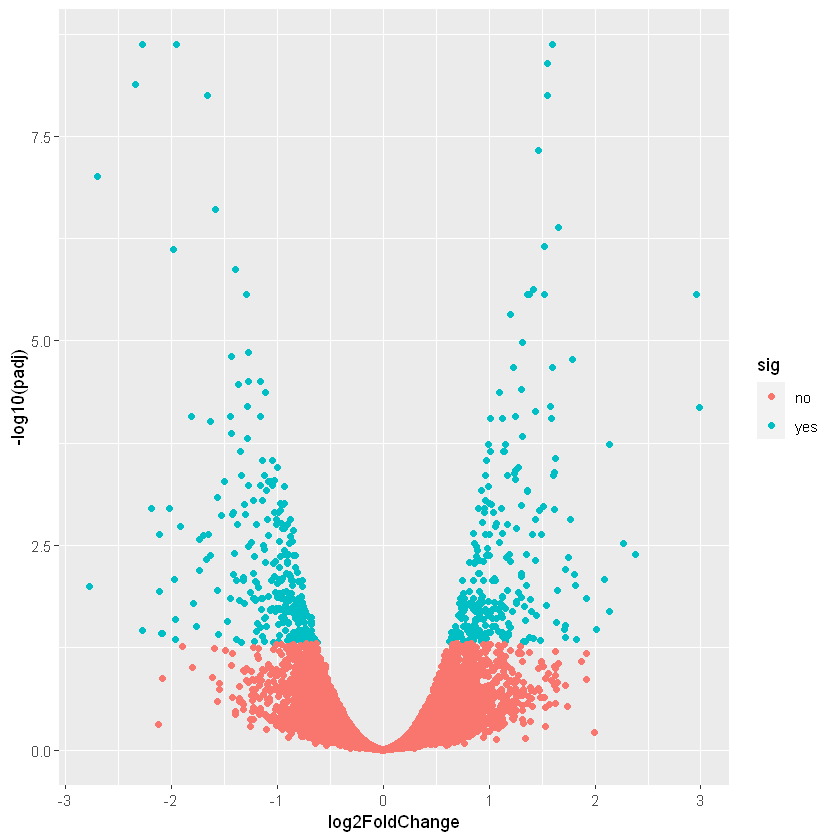

In [18]:
#volcano plot
ggplot(deSeqRes, aes(x = log2FoldChange, y = -log10(padj), color = sig)) + geom_point()

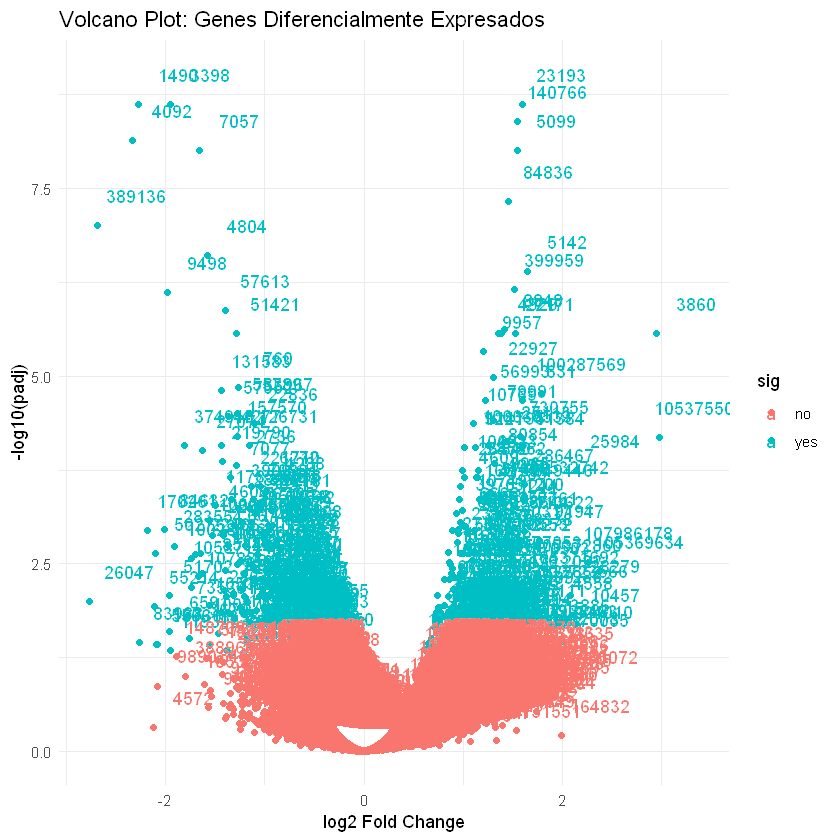

In [19]:
# Crea el gráfico de volcán con etiquetas de genes

ggplot(deSeqRes, aes(x = log2FoldChange, y = -log10(padj), color = sig)) +
  geom_point() +
  geom_text(aes(label = rownames(deSeqRes)), nudge_x = 0.4, nudge_y = 0.4) +  # Agrega las etiquetas
  labs(x = "log2 Fold Change", y = "-log10(padj)", title = "Volcano Plot: Genes Diferencialmente Expresados") +
  theme_minimal()


Attaching package: 'dplyr'


The following object is masked from 'package:Biobase':

    combine


The following object is masked from 'package:matrixStats':

    count


The following objects are masked from 'package:GenomicRanges':

    intersect, setdiff, union


The following object is masked from 'package:GenomeInfoDb':

    intersect


The following objects are masked from 'package:IRanges':

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from 'package:S4Vectors':

    first, intersect, rename, setdiff, setequal, union


The following objects are masked from 'package:BiocGenerics':

    combine, intersect, setdiff, union


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




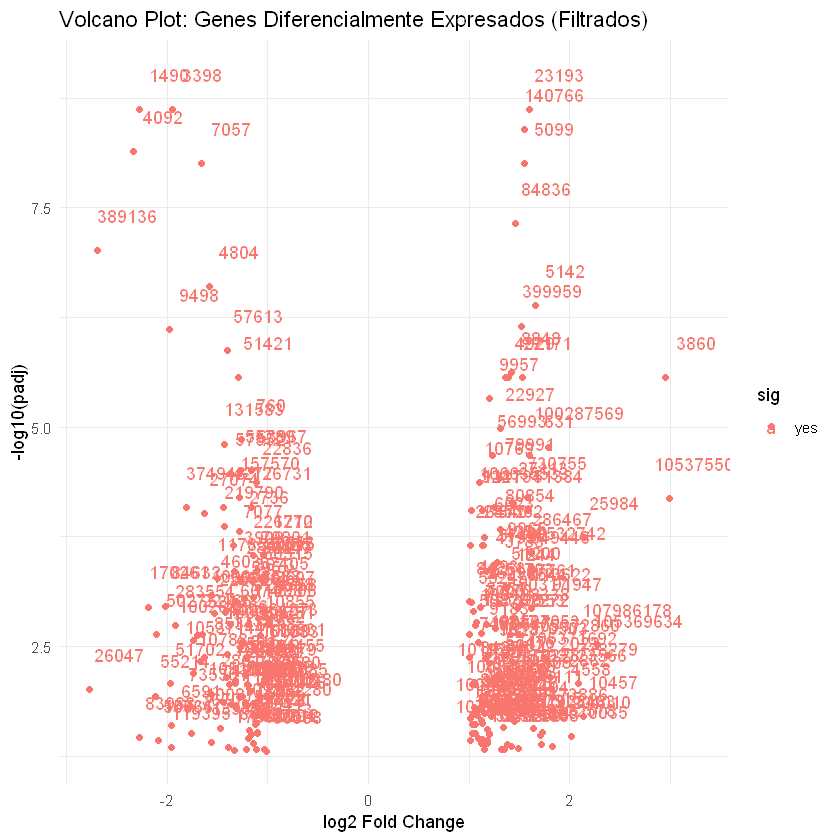

In [22]:
library(dplyr)
# Filtra los datos para incluir solo los genes significativos
umbral_pvalor <- 0.05
umbral_foldchange <- 2  # Por ejemplo, considera genes con un cambio de plegamiento mayor a 2

# Agrega una columna con los nombres de los genes
deSeqRes$gene_name <- row.names(deSeqRes)
deSeqRes_filtrado <- deSeqRes %>%
  filter(padj <= umbral_pvalor, abs(log2FoldChange) >= log2(umbral_foldchange))

# Crea el gráfico de volcán con los datos filtrados
library(ggplot2)
ggplot(deSeqRes_filtrado, aes(x = log2FoldChange, y = -log10(padj), color = sig)) +
  geom_point() +
  geom_text(aes(label = gene_name), nudge_x = 0.3, nudge_y = 0.4) +
  labs(x = "log2 Fold Change", y = "-log10(padj)", title = "Volcano Plot: Genes Diferencialmente Expresados (Filtrados)") +
  theme_minimal()
write.csv(deSeqRes_filtrado, "deSeqRes_filtrado_Fusobacterium_Nucleatum.csv")

El gráfico de PCA permite visualizar la estructura de los datos y observar cómo se agrupan las muestras en función de su expresión génica. Las muestras con perfiles de expresión similares se agruparán cerca unas de otras en el gráfico. Esto es útil para:

Identificar patrones de agrupamiento: Ver si las muestras se agrupan de acuerdo con las condiciones experimentales, lo cual puede sugerir diferencias biológicas entre grupos.
Detectar muestras atípicas: Identificar muestras que no se agrupan con otras de su condición, lo cual podría indicar problemas técnicos o biológicos.
Explorar la variabilidad en los datos: Entender qué proporción de la variación total es explicada por los primeros componentes principales.

,HCT116 cells transfected with siRNA control for 48 h,HCT116 cells transfected with siRNA control for 48 h,HCT116 cells transfected with siRNA targeting KIF26B for 48 h,HCT116 cells transfected with siRNA targeting KIF26B for 48 h
653635,10.324886,10.369186,10.081086,10.515109
102466751,6.684043,6.640470,6.389877,6.609330
100996442,6.973867,6.840122,6.906390,7.172189
729737,10.501717,10.513205,10.383000,10.605768
102723897,10.301643,10.342558,10.061131,10.446501
102465909,5.233001,5.192628,5.093924,5.306446


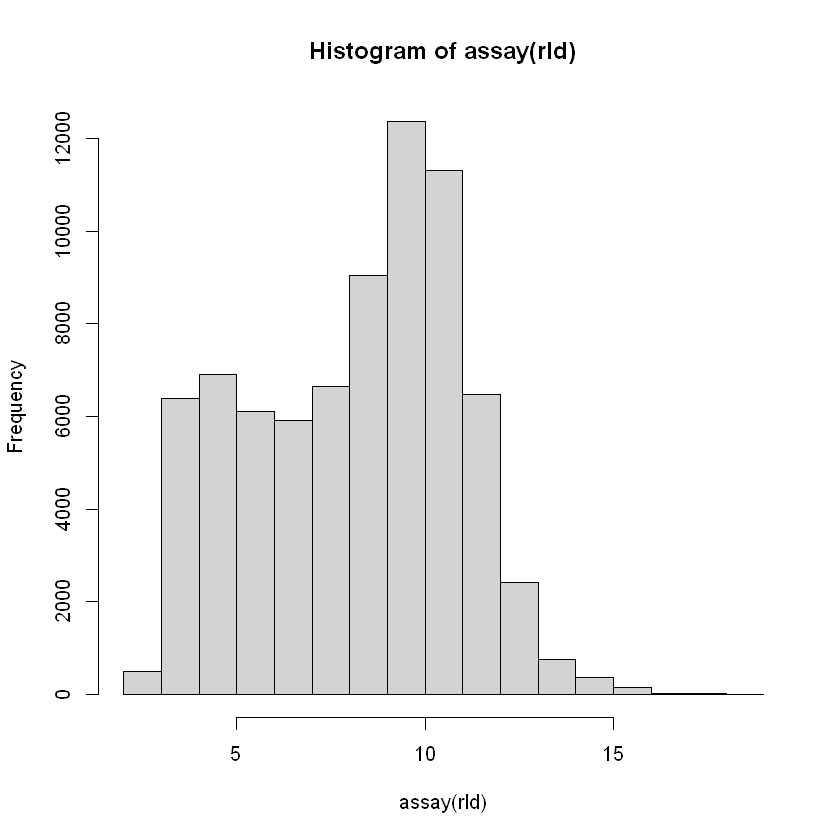

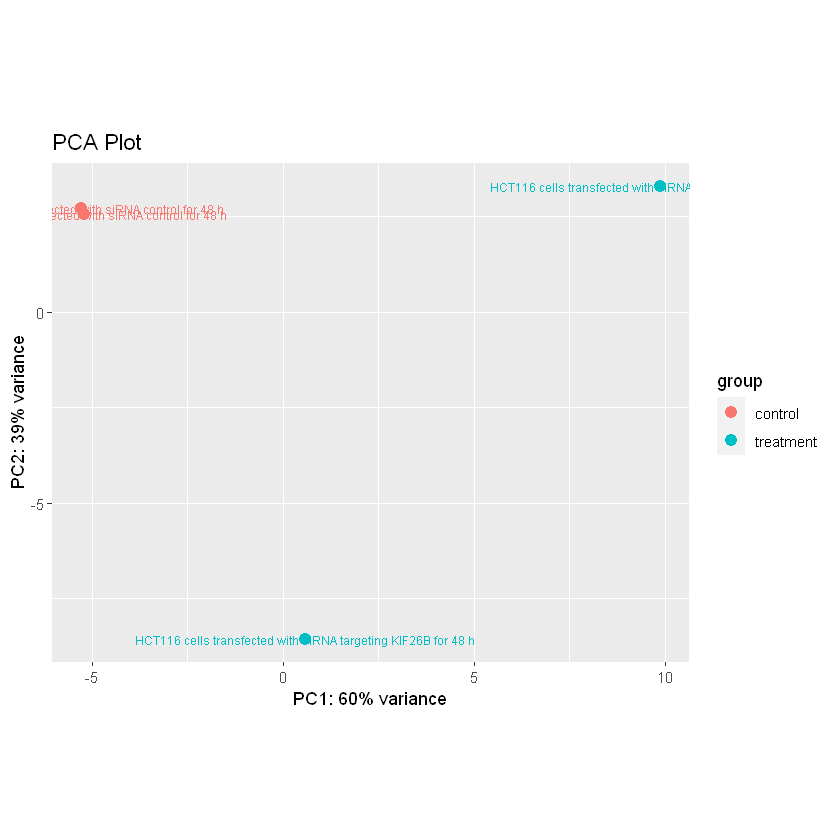

In [39]:
rld <- rlogTransformation(dds, blind = FALSE)
head(assay(rld))
hist(assay(rld))
PCAA <- plotPCA(rld, intgroup='condition')
PCAA + geom_text(aes(label = name),size = 2.5)+ggtitle('PCA Plot')

Este heatmap ayuda a visualizar y explorar los patrones de expresión de los genes significativamente diferenciados, permitiendo identificar grupos de genes que pueden estar coexpresados o que presentan patrones de expresión similares bajo diferentes condiciones experimentales. Es una herramienta útil para detectar patrones globales y potencialmente identificar genes o conjuntos de genes que podrían estar relacionados funcionalmente.

Warning message in lapply(X = x, FUN = .Generic, ...):
"Se han producido NaNs"


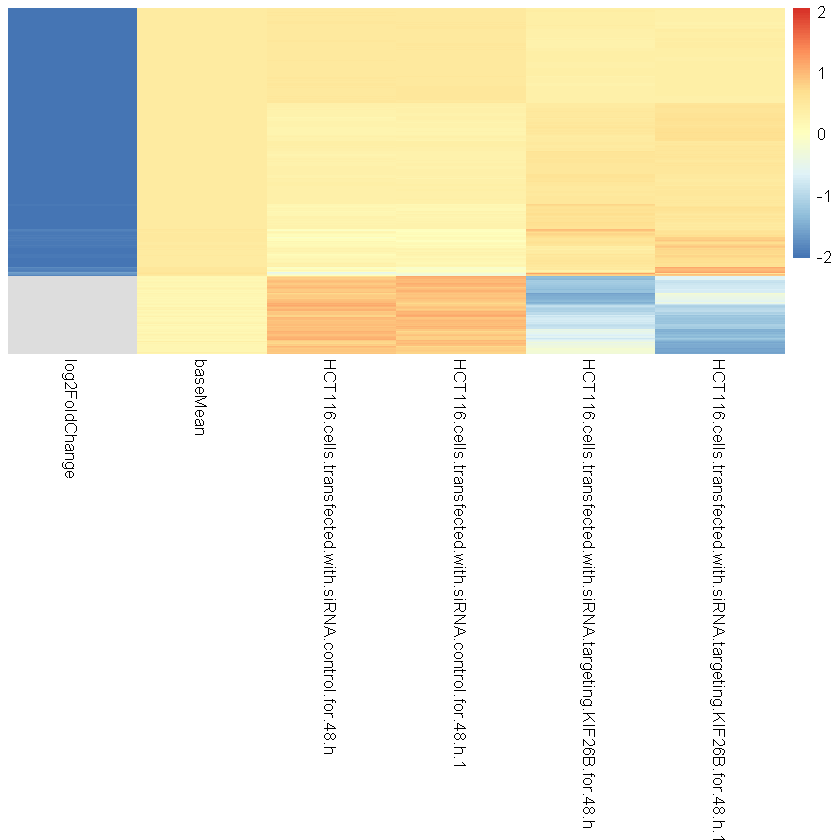

In [40]:
#pheatmap
signi <- subset(deSeqRes, padj <= 0.05)
allSig <- merge(normCount, signi, by = 0)
sigCounts <- allSig[,2:7]
row.names(sigCounts) <- allSig$Row.names
pheatmap(log2(sigCounts + 1), scale = 'row', show_rownames = F, treeheight_row = 0, treeheight_col = 0)

